In [35]:
import liana as li
import scanpy as sc
import anndata as ad


#### LOADING DATA
This sections loads the data from scanpy repository, specifically pbmc3k

In [36]:
adata = sc.datasets.pbmc68k_reduced()
adata.write_h5ad(filename='pbmc68k_reduced.h5ad')

print(adata)

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [3]:
#adata = sc.datasets.pbmc68k_reduced()
#print(adata)

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [37]:
print(adata.obs.head())

                      bulk_labels  n_genes  percent_mito  n_counts   S_score  \
index                                                                          
AAAGCCTGGCTAAC-1   CD14+ Monocyte     1003      0.023856    2557.0 -0.119160   
AAATTCGATGCACA-1        Dendritic     1080      0.027458    2695.0  0.067026   
AACACGTGGTCTTT-1         CD56+ NK     1228      0.016819    3389.0 -0.147977   
AAGTGCACGTGCTA-1  CD4+/CD25 T Reg     1007      0.011797    2204.0  0.065216   
ACACGAACGGAGTG-1        Dendritic     1178      0.017277    3878.0 -0.122974   

                  G2M_score phase louvain  
index                                      
AAAGCCTGGCTAAC-1  -0.816889    G1       1  
AAATTCGATGCACA-1  -0.889498     S       1  
AACACGTGGTCTTT-1  -0.941749    G1       3  
AAGTGCACGTGCTA-1   1.469291   G2M       9  
ACACGAACGGAGTG-1  -0.868185    G1       2  


/home/bio/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


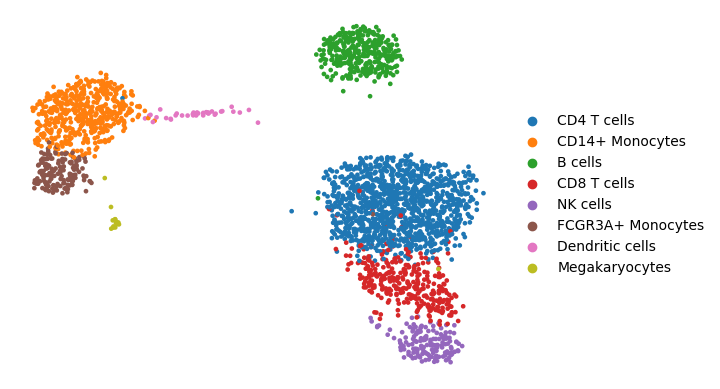

In [3]:
sc.pl.umap(adata, color='louvain', title='', frameon=False)

### LOADING METHODS
This section loads the methods to which test the dataset for intercellular score

In [33]:
from liana.method import scseqcomm

In [29]:
from liana.method._pipe_utils import prep_check_adata, assert_covered, filter_resource, \
    filter_reassemble_complexes
from liana.resource._select_resource import _handle_resource
from liana.method._pipe_utils._reassemble_complexes import explode_complexes
resource = _handle_resource(interactions=None,
                        resource=None,
                        resource_name='consensus',
                        verbose=False)

# explode complexes/decomplexify
resource = explode_complexes(resource)

# Filter Resource
#resource = filter_resource(resource, adata.var_names)
print(resource.shape)
resource.to_csv("lr_db_consensus.csv", index=False)


(5854, 5)


In [34]:
scseqcomm(adata, groupby='louvain', expr_prop=0, key_added = 'scseqcomm_res')

/home/bio/.local/lib/python3.10/site-packages/pandas/core/indexing.py:1728: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


In [26]:
print(adata.uns['scseqcomm_res'].shape)
print(adata.shape)
print(1010*64)

adata.uns['scseqcomm_res']['interaction'] = adata.uns['scseqcomm_res']['ligand'] + '&' + \
                                            adata.uns['scseqcomm_res']['receptor']

(64064, 14)
(2638, 1838)
64640


In [20]:
adata.uns['scseqcomm_res']['interaction'].unique().shape

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
print(adata.uns['scseqcomm_res']['interaction'].unique())

[array(['TNFSF13B&HLA-DPB1', 'HLA-A&LILRB2', 'B2M&LILRB2', ...,
       'WNT16&FZD3', 'WNT5B&FZD3', 'WNT10A&FZD3'], dtype=object)]


Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


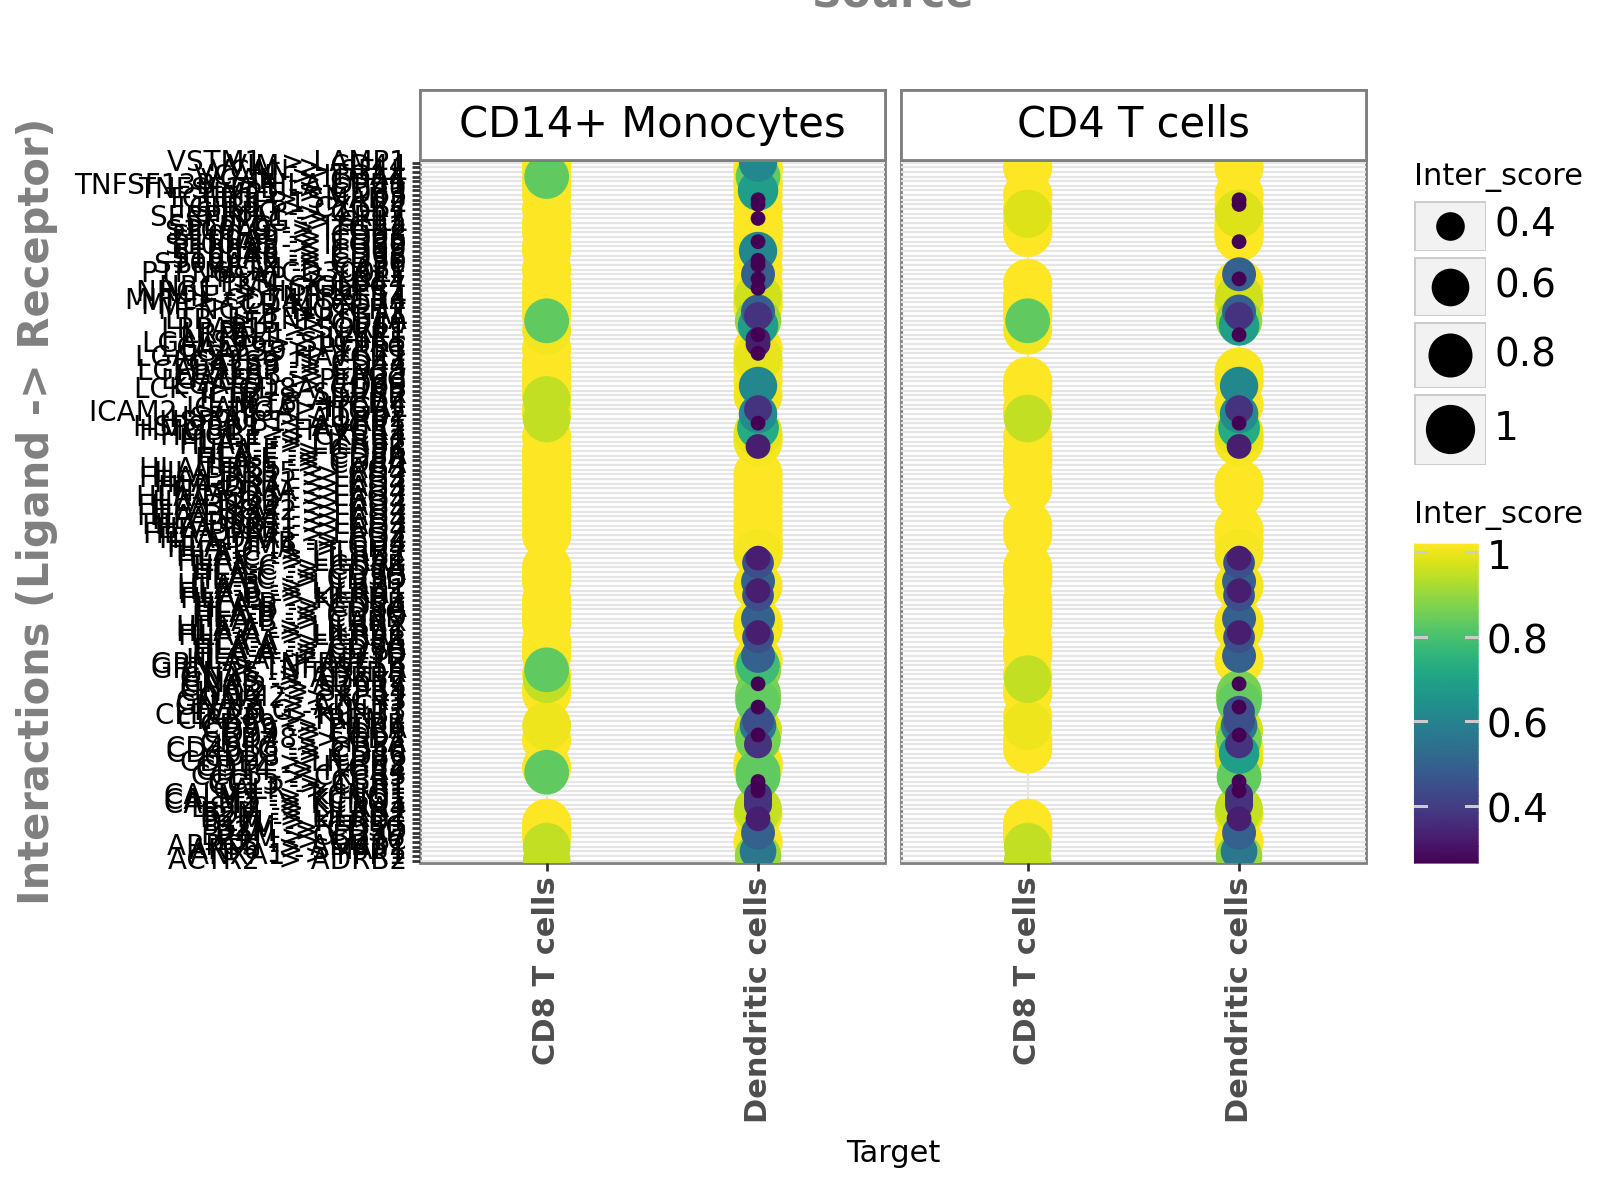

<Figure Size: (800 x 600)>

In [12]:
li.pl.dotplot(adata,
              colour='inter_score',
              size='inter_score',
              uns_key='scseqcomm_res',
              source_labels=['CD4 T cells', 'CD14+ Monocytes'],
              target_labels=['CD8 T cells', 'Dendritic cells'])